In [ ]:
#Imported the drive module from google.colab and mounted it.
from google.colab import drive
drive.mount('/content/drive')
# If you want to unmount it after the usage we can use below command
#drive.flush_and_unmount()

Mounted at /content/drive


#Pre-Processing

In [ ]:
#Imported the Pandas Librarys
import pandas as pd

#Reading the Motor_Vehicle_Collisions_-_Vehicles.csv file for analysis
data=pd.read_csv('/content/drive/MyDrive/Motor_Vehicle_Collisions_-_Vehicles.csv')

#data['CRASH_DATE']=pd.to_datetime(data.CRASH_DATE, errors='coerce')
#Converting the CRASH_DATE Column to datatime
data['CRASH_DATE']=pd.to_datetime(data.CRASH_DATE)
data.shape

(3704406, 25)

In [ ]:
#Filtering data according to the requirement i.e. from start_date to end_date
start_date='2019-07-01'
end_date='2021-06-30'
my_data = data.query('CRASH_DATE >= @start_date and CRASH_DATE <= @end_date')
#my_data.head()
print(my_data.shape)
#Create a new a CSV file with Year's to analyse
my_data.to_csv('/content/drive/MyDrive/Analysis_file.csv')

(551000, 25)


In [ ]:
#Import the latest CSV File 
df1=pd.read_csv('/content/drive/MyDrive/Analysis_file.csv',index_col=0)
#df1.shape
df1.head(3)

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,VEHICLE_ID,STATE_REGISTRATION,VEHICLE_TYPE,VEHICLE_MAKE,VEHICLE_MODEL,VEHICLE_YEAR,...,PRE_CRASH,POINT_OF_IMPACT,VEHICLE_DAMAGE,VEHICLE_DAMAGE_1,VEHICLE_DAMAGE_2,VEHICLE_DAMAGE_3,PUBLIC_PROPERTY_DAMAGE,PUBLIC_PROPERTY_DAMAGE_TYPE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2
1,19140702,4213082,2019-09-23,8:15,0553ab4d-9500-4cba-8d98-f4d7f89d5856,NY,Station Wagon/Sport Utility Vehicle,TOYT -CAR/SUV,NaN,2002.0,...,Going Straight Ahead,Left Front Bumper,Left Front Quarter Panel,NaN,NaN,NaN,N,NaN,Driver Inattention/Distraction,Unspecified
6,19138701,4229067,2019-10-24,13:15,c53b43d9-419a-4ab1-9361-3f2979078d89,NY,Bus,FRHT-TRUCK/BUS,NaN,2006.0,...,Parked,Left Front Quarter Panel,Left Front Quarter Panel,NaN,NaN,NaN,N,NaN,Unspecified,Unspecified
13,19140791,4229563,2019-10-21,17:55,86a294b4-6672-4a7e-8357-39d6d2eff9f7,PA,Sedan,BMW -CAR/SUV,NaN,2006.0,...,Going Straight Ahead,Center Front End,Right Front Bumper,Right Front Quarter Panel,Right Front Bumper,NaN,N,NaN,Unspecified,Unspecified


In [ ]:
#Searching for null values in every columns and it's count
df1.isnull().sum()

UNIQUE_ID                           0
COLLISION_ID                        0
CRASH_DATE                          0
CRASH_TIME                          0
VEHICLE_ID                          0
STATE_REGISTRATION              74550
VEHICLE_TYPE                    56185
VEHICLE_MAKE                    83796
VEHICLE_MODEL                  551000
VEHICLE_YEAR                    88174
TRAVEL_DIRECTION                34016
VEHICLE_OCCUPANTS               61300
DRIVER_SEX                     163475
DRIVER_LICENSE_STATUS          179581
DRIVER_LICENSE_JURISDICTION    181005
PRE_CRASH                       40791
POINT_OF_IMPACT                 41920
VEHICLE_DAMAGE                  47658
VEHICLE_DAMAGE_1               217322
VEHICLE_DAMAGE_2               297279
VEHICLE_DAMAGE_3               358392
PUBLIC_PROPERTY_DAMAGE              0
PUBLIC_PROPERTY_DAMAGE_TYPE    544750
CONTRIBUTING_FACTOR_1           32374
CONTRIBUTING_FACTOR_2           37865
dtype: int64

In [ ]:
#Null values in the VEHICLE_MAKE Column
df1['VEHICLE_MAKE'].isnull().sum()

83796

In [ ]:
#Dropping the rows which have null values in VEHICLE_MAKE Column
df1=df1.dropna(axis=0,subset=['VEHICLE_MAKE'])
df1.shape

(467204, 25)

In [ ]:
#Function
# Importing re package for using regular expressions
import re  
# Function to clean the names
def Clean_names(VEHICLE_MAKE):
#Regex to search for hyphen(-) in the name followed by any #characters repeated any number of times
    if re.search('\-.*', VEHICLE_MAKE):  
        # Extract the position of beginning of pattern
        pos = re.search('\-.*', VEHICLE_MAKE).start()  
        # return the cleaned name
        return VEHICLE_MAKE[:pos]  
    else:
        # if clean up needed return the same name
        return VEHICLE_MAKE
         
# Update the vehicle_make columns
df1['VEHICLE_MAKE'] = df1['VEHICLE_MAKE'].apply(Clean_names)
df1.shape

(467204, 25)

In [ ]:
df1.head(2)

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,VEHICLE_ID,STATE_REGISTRATION,VEHICLE_TYPE,VEHICLE_MAKE,VEHICLE_MODEL,VEHICLE_YEAR,...,PRE_CRASH,POINT_OF_IMPACT,VEHICLE_DAMAGE,VEHICLE_DAMAGE_1,VEHICLE_DAMAGE_2,VEHICLE_DAMAGE_3,PUBLIC_PROPERTY_DAMAGE,PUBLIC_PROPERTY_DAMAGE_TYPE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2
1,19140702,4213082,2019-09-23,8:15,0553ab4d-9500-4cba-8d98-f4d7f89d5856,NY,Station Wagon/Sport Utility Vehicle,TOYT,NaN,2002.0,...,Going Straight Ahead,Left Front Bumper,Left Front Quarter Panel,NaN,NaN,NaN,N,NaN,Driver Inattention/Distraction,Unspecified
6,19138701,4229067,2019-10-24,13:15,c53b43d9-419a-4ab1-9361-3f2979078d89,NY,Bus,FRHT,NaN,2006.0,...,Parked,Left Front Quarter Panel,Left Front Quarter Panel,NaN,NaN,NaN,N,NaN,Unspecified,Unspecified


#Query 1
We are using df1 for the analysis 1.

In [ ]:
#Converting the VEHICLE_MAKE Column into to a str type and stripping the whitespaces if any
df1['VEHICLE_MAKE'].head()
df1['VEHICLE_MAKE'] = df1['VEHICLE_MAKE'].str.strip()

In [ ]:
#Creating a df ISU which contains count of year wise accidents
#Copying the content of df1 to ISU
ISU=df1.loc[df1['VEHICLE_MAKE'] == 'ISU'].copy()

#Converting/updating the column CRASH_DATE to datetime
ISU['CRASH_DATE']=pd.to_datetime(ISU.CRASH_DATE)

#Grouping the data based on the CRASH_DATE and getting the count of it
ISU=ISU.groupby(ISU['CRASH_DATE'].dt.year).count()
ISU

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,VEHICLE_ID,STATE_REGISTRATION,VEHICLE_TYPE,VEHICLE_MAKE,VEHICLE_MODEL,VEHICLE_YEAR,...,PRE_CRASH,POINT_OF_IMPACT,VEHICLE_DAMAGE,VEHICLE_DAMAGE_1,VEHICLE_DAMAGE_2,VEHICLE_DAMAGE_3,PUBLIC_PROPERTY_DAMAGE,PUBLIC_PROPERTY_DAMAGE_TYPE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2
CRASH_DATE,,,,,,,,,,,,,,,,,,,,,
2019,1051,1051,1051,1051,1051,1051,1030,1051,0,1044,...,1045,1041,1034,511,428,397,1051,0,1049,1046
2020,779,779,779,779,779,779,766,779,0,777,...,762,760,756,401,333,302,779,0,770,766
2021,276,276,276,276,276,275,270,276,0,272,...,273,267,264,147,121,108,276,0,274,268


In [ ]:
#Creating a df LNDR which contains count of year wise accidents
#Copying the content of df1 to LNDR
LNDR=df1.loc[df1['VEHICLE_MAKE'] == 'LNDR'].copy()

#Converting/Updating the column CRASH_DATE to datetime
LNDR['CRASH_DATE']=pd.to_datetime(LNDR.CRASH_DATE)

#Grouping the data based on the CRASH_DATE and getting the count of it
LNDR=LNDR.groupby(LNDR['CRASH_DATE'].dt.year).count()
LNDR

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,VEHICLE_ID,STATE_REGISTRATION,VEHICLE_TYPE,VEHICLE_MAKE,VEHICLE_MODEL,VEHICLE_YEAR,...,PRE_CRASH,POINT_OF_IMPACT,VEHICLE_DAMAGE,VEHICLE_DAMAGE_1,VEHICLE_DAMAGE_2,VEHICLE_DAMAGE_3,PUBLIC_PROPERTY_DAMAGE,PUBLIC_PROPERTY_DAMAGE_TYPE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2
CRASH_DATE,,,,,,,,,,,,,,,,,,,,,
2019,824,824,824,824,824,816,819,824,0,806,...,818,815,813,533,397,292,824,0,822,821
2020,906,906,906,906,906,890,898,906,0,869,...,889,891,884,635,488,345,906,0,897,892
2021,442,442,442,442,442,439,437,442,0,430,...,437,433,432,292,219,153,442,0,439,438


In [ ]:
#Creating a df HOND which contains count of year wise accidents
#Copying the content of df1 to HOND
HOND=df1.loc[df1['VEHICLE_MAKE'] == 'HOND'].copy()

#Converting/Updating the column CRASH_DATE to datetime
HOND['CRASH_DATE']=pd.to_datetime(HOND.CRASH_DATE)

#Grouping the data based on the CRASH_DATE and getting the count of it
HOND=HOND.groupby(HOND['CRASH_DATE'].dt.year).count()
HOND

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,VEHICLE_ID,STATE_REGISTRATION,VEHICLE_TYPE,VEHICLE_MAKE,VEHICLE_MODEL,VEHICLE_YEAR,...,PRE_CRASH,POINT_OF_IMPACT,VEHICLE_DAMAGE,VEHICLE_DAMAGE_1,VEHICLE_DAMAGE_2,VEHICLE_DAMAGE_3,PUBLIC_PROPERTY_DAMAGE,PUBLIC_PROPERTY_DAMAGE_TYPE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2
CRASH_DATE,,,,,,,,,,,,,,,,,,,,,
2019,23560,23560,23560,23560,23560,23435,23463,23560,0,23270,...,23399,23390,23315,15776,11630,8623,23560,0,23466,23421
2020,25170,25170,25170,25170,25170,24883,24981,25170,0,24548,...,24903,24919,24791,17847,13288,9558,25170,0,25027,24947
2021,11779,11779,11779,11779,11779,11601,11654,11779,0,11374,...,11651,11618,11541,8672,6588,4813,11779,0,11699,11641


In [ ]:
#Creating a df MERZ which contains count of year wise accidents
#Copying the content of df1 to MERZ
MERZ=df1.loc[df1['VEHICLE_MAKE'] == 'MERZ'].copy()

#Converting/Updating the column CRASH_DATE to datetime
MERZ['CRASH_DATE']=pd.to_datetime(MERZ.CRASH_DATE)

#Grouping the data based on the CRASH_DATE and getting the count of it
MERZ=MERZ.groupby(MERZ['CRASH_DATE'].dt.year).count()
MERZ

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,VEHICLE_ID,STATE_REGISTRATION,VEHICLE_TYPE,VEHICLE_MAKE,VEHICLE_MODEL,VEHICLE_YEAR,...,PRE_CRASH,POINT_OF_IMPACT,VEHICLE_DAMAGE,VEHICLE_DAMAGE_1,VEHICLE_DAMAGE_2,VEHICLE_DAMAGE_3,PUBLIC_PROPERTY_DAMAGE,PUBLIC_PROPERTY_DAMAGE_TYPE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2
CRASH_DATE,,,,,,,,,,,,,,,,,,,,,
2019,6571,6571,6571,6571,6571,6531,6534,6571,0,6460,...,6513,6510,6487,4278,3182,2434,6571,0,6540,6526
2020,6842,6842,6842,6842,6842,6725,6749,6842,0,6556,...,6737,6755,6699,4674,3589,2585,6842,0,6788,6755
2021,3325,3325,3325,3325,3325,3240,3283,3325,0,3160,...,3273,3271,3244,2356,1814,1330,3325,0,3295,3271


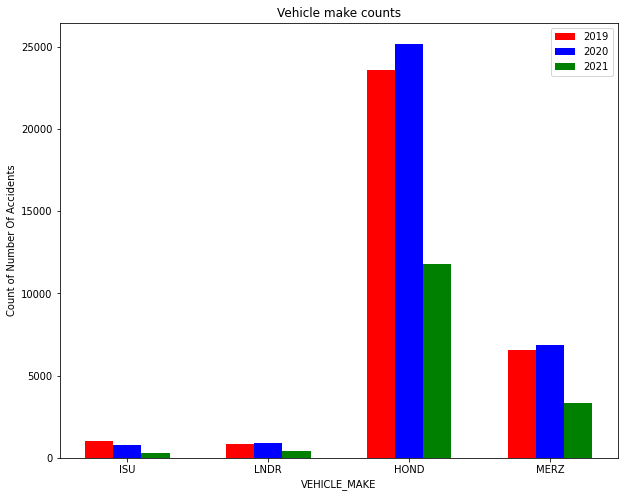

In [ ]:
#BAR GRAPH
import numpy as np 
import matplotlib.pyplot as plt 
#VEHICLE MAKE's for which we are supposed to do the analysis
Vehicle_make= ['ISU','LNDR','HOND','MERZ']

#I,L,H Represnts the year wise counts of accidents of respective VEHICLE MAKEs
I = [ISU.VEHICLE_MAKE.values[0],LNDR.VEHICLE_MAKE.values[0],HOND.VEHICLE_MAKE.values[0],MERZ.VEHICLE_MAKE.values[0]]
L = [ISU.VEHICLE_MAKE.values[1],LNDR.VEHICLE_MAKE.values[1],HOND.VEHICLE_MAKE.values[1],MERZ.VEHICLE_MAKE.values[1]]
H = [ISU.VEHICLE_MAKE.values[2],LNDR.VEHICLE_MAKE.values[2],HOND.VEHICLE_MAKE.values[2],MERZ.VEHICLE_MAKE.values[2]]

#Plot/Figure size can be increased using the below function
plt.figure(figsize=(10,8))

#Arranging the x-axis based upon the length of the Vehicle make
X_axis = np.arange(len(Vehicle_make))

#Plotting the values 
plt.bar(X_axis-0.2 , I,0.2,color='r',label = '2019')
plt.bar(X_axis     , L,0.2,color='b',label = '2020')
plt.bar(X_axis+0.2 ,H,0.2,color='g',label='2021')
  
plt.xticks(X_axis, Vehicle_make)
plt.xlabel("VEHICLE_MAKE")
plt.ylabel("Count of Number Of Accidents")
plt.title("Vehicle make counts")
plt.legend()
plt.show()


#Query2
The DataFrame df1 can be used here as well as the column on which we are analyizing is the same(VEHICLE_MAKE)

In [ ]:
#Converting the CRASH_DATE Column to datetime
df1['CRASH_DATE']=pd.to_datetime(df1.CRASH_DATE)

In [ ]:
#Creating DataFrame ISU2 which contains month wise accidents of this vehicle make in the given years
#Copying the content of df1 to ISU2
ISU2= df1.loc[df1['VEHICLE_MAKE'] == 'ISU'].copy()
#Converting/Updating the CRASH_DATE of ISU2 to datetime and extracting the name of the month from it. 
ISU2['CRASH_DATE']=pd.to_datetime(ISU2.CRASH_DATE).dt.strftime('%b')
#Grouping the DF on the CRASH_DATE and getting the count of it.
ISU2=ISU2.groupby(ISU2['CRASH_DATE']).count()


In [ ]:
#Creating DataFrame LNDR2 which contains month wise accidents of this vehicle make in the given years
#Copying the content of df1 to LNDR2
LNDR2= df1.loc[df1['VEHICLE_MAKE'] == 'LNDR'].copy()
#Converting/Updating the CRASH_DATE of LNDR2 to datetime and extracting the name of the month from it. 
LNDR2['CRASH_DATE']=pd.to_datetime(LNDR2.CRASH_DATE).dt.strftime('%b')
#Grouping the DF on the CRASH_DATE and getting the count of it.
LNDR2=LNDR2.groupby(LNDR2['CRASH_DATE']).count()


In [ ]:
#Creating DataFrame HOND2 which contains month wise accidents of this vehicle make in the given years
#Copying the content of df1 to HOND2
HOND2= df1.loc[df1['VEHICLE_MAKE'] == 'HOND'].copy()
#Converting/Updating the CRASH_DATE of HOND2 to datetime and extracting the name of the month from it.
HOND2['CRASH_DATE']=pd.to_datetime(HOND2.CRASH_DATE).dt.strftime('%b')
#Grouping the DF on the CRASH_DATE and getting the count of it.
HOND2=HOND2.groupby(HOND2['CRASH_DATE']).count()


In [ ]:
#Creating DataFrame MERZ2 which contains month wise accidents of this vehicle make in the given years
#Copying the content of df1 to MERZ2
MERZ2= df1.loc[df1['VEHICLE_MAKE'] == 'MERZ'].copy()
#Converting/Updating the CRASH_DATE of HOND2 to datetime and extracting the name of the month from it.
MERZ2['CRASH_DATE']=pd.to_datetime(MERZ2.CRASH_DATE).dt.strftime('%b')
#Grouping the DF on the CRASH_DATE and getting the count of it.
MERZ2=MERZ2.groupby(MERZ2['CRASH_DATE']).count()


We need to sort the months in an order before we visualize it.

In [ ]:
#Created a dictionary with Key's as the months and it's mapped integer numbers with values
months= {'Jan':1,'Feb':2,'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}

Here, Initially the value from the CRASH_DATE column is picked up(basically month) and is been mapped with it's appropriate value(no.of the month in a given year) as defined in the months dictionary. This operation is been applied for all the values in the CRASH_DATE. So we have a key value mapping after this and later the sort_values , sorts the rows based on the key of the particular value and hence we obtain a chronology for the months in the output.

In [ ]:
ISU2=ISU2.sort_values('CRASH_DATE', key = lambda x : x.apply (lambda x : months[x]))


In [ ]:
LNDR2=LNDR2.sort_values('CRASH_DATE', key = lambda x : x.apply (lambda x : months[x]))


In [ ]:
HOND2=HOND2.sort_values('CRASH_DATE', key = lambda x : x.apply (lambda x : months[x]))


In [ ]:
MERZ2=MERZ2.sort_values('CRASH_DATE', key = lambda x : x.apply (lambda x : months[x]))


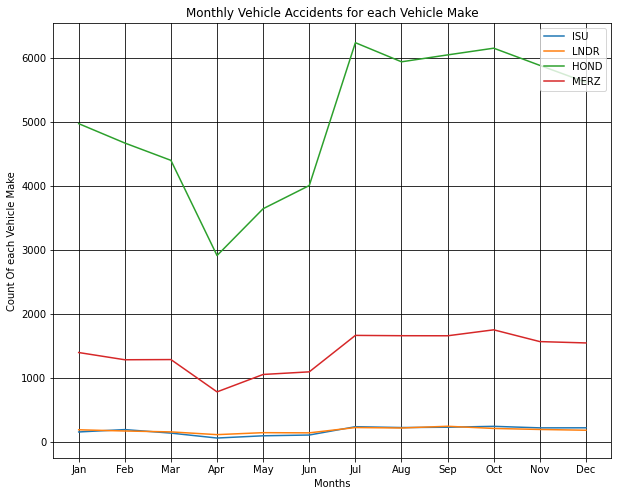

In [ ]:
#Line Graph
import numpy as np 
import matplotlib.pyplot as plt 

#Figure Size of the Graph
plt.figure(figsize=(10,8))

#Plotting the graph using the extracted values
plt.plot(ISU2.VEHICLE_MAKE,label='ISU');
plt.plot(LNDR2.VEHICLE_MAKE,label='LNDR');
plt.plot(HOND2.VEHICLE_MAKE,label='HOND');
plt.plot(MERZ2.VEHICLE_MAKE,label='MERZ');

#Plot decor
plt.xlabel("Months")
plt.ylabel("Count Of each Vehicle Make")
plt.title("Monthly Vehicle Accidents for each Vehicle Make")
plt.grid(True,color='k')
plt.legend(loc=1)
plt.show()

# Query 3
DataFrame df3 is for the analysis of 3rd Query

In [ ]:
#Imported pandas Library 
import pandas as pd
#Readig the CSV File with the years to analysis
df3=pd.read_csv('/content/drive/MyDrive/Analysis_file.csv',index_col=0)
df3.shape

(551000, 25)

In [ ]:
#Sum of null values present in each of the column in the DataFrame
df3.isnull().sum()

UNIQUE_ID                           0
COLLISION_ID                        0
CRASH_DATE                          0
CRASH_TIME                          0
VEHICLE_ID                          0
STATE_REGISTRATION              74550
VEHICLE_TYPE                    56185
VEHICLE_MAKE                    83796
VEHICLE_MODEL                  551000
VEHICLE_YEAR                    88174
TRAVEL_DIRECTION                34016
VEHICLE_OCCUPANTS               61300
DRIVER_SEX                     163475
DRIVER_LICENSE_STATUS          179581
DRIVER_LICENSE_JURISDICTION    181005
PRE_CRASH                       40791
POINT_OF_IMPACT                 41920
VEHICLE_DAMAGE                  47658
VEHICLE_DAMAGE_1               217322
VEHICLE_DAMAGE_2               297279
VEHICLE_DAMAGE_3               358392
PUBLIC_PROPERTY_DAMAGE              0
PUBLIC_PROPERTY_DAMAGE_TYPE    544750
CONTRIBUTING_FACTOR_1           32374
CONTRIBUTING_FACTOR_2           37865
dtype: int64

In [ ]:
#Null values in the Vehicle_type column
df3['VEHICLE_TYPE'].isnull().sum()

56185

In [ ]:
#Dropping the null valued rows based on column Vehicle_type from dataframe
df3=df3.dropna(axis=0,subset=['VEHICLE_TYPE'])
df3.shape

(494815, 25)

In [ ]:
#Describes the vehicle_type column characteristics
df3['VEHICLE_TYPE'].describe()

count     494815
unique      1064
top        Sedan
freq      222857
Name: VEHICLE_TYPE, dtype: object

In [ ]:
#Cleaning the names
import re
#Creating a function Cleaning 
def Cleaning(vehicle_type):
  #converting the string to lower case
  name=str(vehicle_type).lower()
  #searching for the string *sedan* in the string value of the vehicle type(name) and if found returning Sedans
  if re.search('.*sedan.*',name):
    return 'Sedans'
  #searching for the string *passenger* in the string value of the vehicle type(name) and if found returning PASSENGER VEHICLE
  if re.search('.*passenger.*',name):
    return 'PASSENGER VEHICLE'
  #searching for the string *sport or station* in the string value of the vehicle type(name) and if found returning Sport Utility Vehicle
  if re.search('.*sport.* | .*station.*',name):
    return 'Sport Utility Vehicle'
  #searching for the string *taxi* in the string value of the vehicle type(name) and if found returning Taxi
  if re.search('.*taxi.*',name):
    return 'Taxi'
  #searching for the string *van* in the string value of the vehicle type(name) and if found returning VAN
  if re.search('.*van.*',name):
    return 'VAN' 
  #searching for the string *bike* in the string value of the vehicle type(name) and if found returning Bike
  if re.search('.*bike.*',name):
    return 'Bike'
  #searching for the string *bus* in the string value of the vehicle type(name) and if found returning Bus
  if re.search('.*bus.*',name):
    return 'Bus'
  #searching for the string *truck* in the string value of the vehicle type(name) and if found returning Truck
  if re.search('.*truck.*',name):
    return 'Truck'
  #searching for the string *motorcycle* in the string value of the vehicle type(name) and if found returning Motorcycle
  if re.search('.*motorcycle.*',name):
    return 'Motorcycle'
  #searching for the string *bicycle* in the string value of the vehicle type(name) and if found returning Bicycle
  if re.search('.*bicycle.*',name):
    return 'Bicycle'
#There is no else condition written her because we are only filtering the 10 vehicle types which are to be analyzed 
#in the datasets and no bothered about the rest of them 

#Update the Vehicle type column
df3['VEHICLE_TYPE']=df3['VEHICLE_TYPE'].apply(Cleaning)
df3.shape


(494815, 25)

In [ ]:
#Creating a dataframe vt_count and grouping the column VEHICLE TYPE and getting the count of it
vt_count=df3.groupby(['VEHICLE_TYPE']).count()
vt_count

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,VEHICLE_ID,STATE_REGISTRATION,VEHICLE_MAKE,VEHICLE_MODEL,VEHICLE_YEAR,TRAVEL_DIRECTION,...,PRE_CRASH,POINT_OF_IMPACT,VEHICLE_DAMAGE,VEHICLE_DAMAGE_1,VEHICLE_DAMAGE_2,VEHICLE_DAMAGE_3,PUBLIC_PROPERTY_DAMAGE,PUBLIC_PROPERTY_DAMAGE_TYPE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2
VEHICLE_TYPE,,,,,,,,,,,,,,,,,,,,,
Bicycle,1,1,1,1,1,0,0,0,0,1,...,1,1,1,0,0,0,1,0,1,1
Bike,13272,13272,13272,13272,13272,723,748,0,384,13201,...,13078,13139,13066,6197,5683,5346,13272,0,13218,13174
Bus,7665,7665,7665,7665,7665,7495,6635,0,7199,7618,...,7576,7564,7527,3869,3113,2821,7665,0,7619,7580
Motorcycle,3448,3448,3448,3448,3448,2885,3036,0,3021,3431,...,3411,3411,3378,2074,1642,1317,3448,0,3436,3413
PASSENGER VEHICLE,5,5,5,5,5,4,5,0,4,5,...,5,5,5,5,4,3,5,0,5,5
Sedans,223531,223531,223531,223531,223531,218783,217015,0,214234,222197,...,221112,221143,219859,155824,117571,86214,223531,0,222333,221462
Sport Utility Vehicle,179304,179304,179304,179304,179304,177024,174805,0,174284,178570,...,177964,177781,176918,118959,88048,64794,179304,0,178656,178068
Taxi,16763,16763,16763,16763,16763,16668,16445,0,16475,16710,...,16650,16665,16606,11956,9448,7676,16763,0,16723,16688
Truck,31127,31127,31127,31127,31127,30131,28258,0,28863,30843,...,30695,30696,30382,16673,13297,11287,31127,0,30901,30720


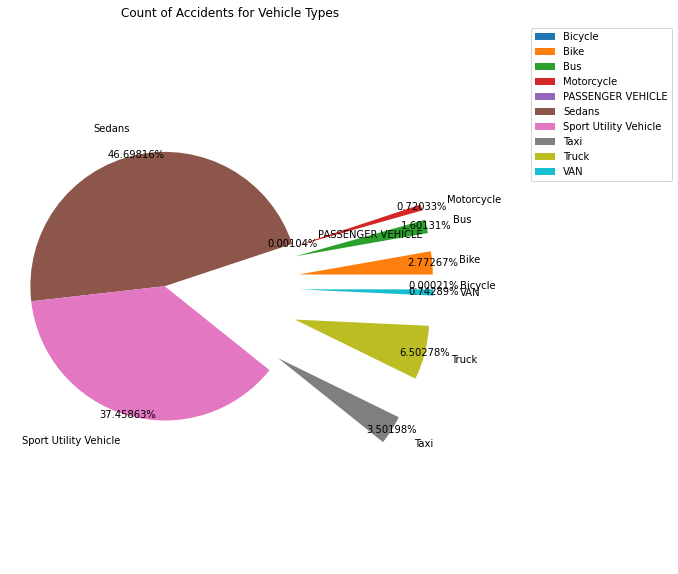

In [ ]:
#Pie Chart
import matplotlib.pyplot as plt

#This is to adjust the size of the Graph
plt.figure(4,figsize=(8,10))

#Creating myeplode list
myexplode = [1,1,1,1,0,0,0,1,1,1]

#The vt_count.CRASH_DATE.values gives the values(count of crashes)
data = vt_count.CRASH_DATE.values
#The vt_count.CRASH_DATE.index gives the type of vehicle of the crash
label = vt_count.CRASH_DATE.index

#Gives upto 5values after the point 
#startangle is 0, which would start the first slice on the positive x-axis. 
plt.pie(data,autopct='%1.5f%%', labels=label, explode=myexplode, shadow=False,startangle=0,pctdistance=1,labeldistance=1.2)

plt.title('Count of Accidents for Vehicle Types')

#bbox_to_anchor accepts a list of four values: (x0, y0, width, height) it is to adjust the legend position
plt.legend(label,loc="best",bbox_to_anchor=(1, 0, 0.5, 1))
plt.axis('equal')
plt.show()


#Sample

In [ ]:
#Seed value is Feb 21st 1999
sample_data=df1.sample(100, random_state = 2211999)
sample_data.head(2)

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,VEHICLE_ID,STATE_REGISTRATION,VEHICLE_TYPE,VEHICLE_MAKE,VEHICLE_MODEL,VEHICLE_YEAR,...,PRE_CRASH,POINT_OF_IMPACT,VEHICLE_DAMAGE,VEHICLE_DAMAGE_1,VEHICLE_DAMAGE_2,VEHICLE_DAMAGE_3,PUBLIC_PROPERTY_DAMAGE,PUBLIC_PROPERTY_DAMAGE_TYPE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2
3279874,19778367,4359392,2020-10-19,20:10,f9fea0a1-ce41-4354-ba4f-17d3abea2754,MI,Motorcycle,BMW,NaN,2005.0,...,Going Straight Ahead,Right Rear Quarter Panel,Right Rear Quarter Panel,Right Rear Bumper,Right Side Doors,NaN,N,NaN,Unspecified,Unspecified
3228006,19726776,4334232,2020-08-02,10:30,e636fe7f-c8a0-460c-991b-e12ebaacf5d4,NY,Sedan,TOYT,NaN,2005.0,...,Going Straight Ahead,Right Rear Quarter Panel,Right Rear Quarter Panel,No Damage,No Damage,No Damage,N,NaN,Driver Inattention/Distraction,Unspecified


In [ ]:
sample_data['VEHICLE_MAKE'].head()
sample_data['VEHICLE_MAKE'] = sample_data['VEHICLE_MAKE'].str.strip()

Query1 Sample

In [ ]:
t_MERZ= sample_data.loc[sample_data['VEHICLE_MAKE'] == 'MERZ'].copy()
t_MERZ['CRASH_DATE']=pd.to_datetime(t_MERZ.CRASH_DATE)
t_MERZ=t_MERZ.groupby(t_MERZ['CRASH_DATE'].dt.year).count()
t_MERZ.VEHICLE_MAKE

CRASH_DATE
2019    1
2020    3
Name: VEHICLE_MAKE, dtype: int64

In [ ]:
t_HOND= sample_data.loc[sample_data['VEHICLE_MAKE'] == 'HOND'].copy()
t_HOND['CRASH_DATE']=pd.to_datetime(t_HOND.CRASH_DATE)
t_HOND=t_HOND.groupby(t_HOND['CRASH_DATE'].dt.year).count()
t_HOND.VEHICLE_MAKE


CRASH_DATE
2019    1
2020    6
2021    3
Name: VEHICLE_MAKE, dtype: int64

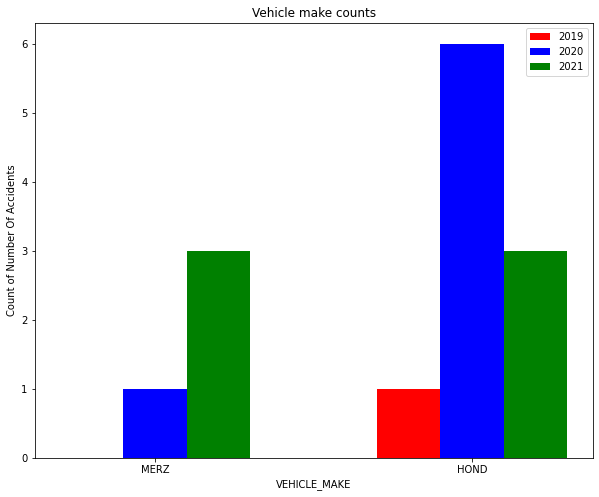

In [ ]:
#BAR GRAPH
import numpy as np 
import matplotlib.pyplot as plt 
  
Vehicle_make= ['MERZ','HOND']
I = [0,t_HOND.VEHICLE_MAKE.values[0]]
L = [t_MERZ.VEHICLE_MAKE.values[0],t_HOND.VEHICLE_MAKE.values[1]]
H = [t_MERZ.VEHICLE_MAKE.values[1],t_HOND.VEHICLE_MAKE.values[2]]

#Plot/Figure size can be increased using the below function
plt.figure(figsize=(10,8))
X_axis = np.arange(len(Vehicle_make))
  
plt.bar(X_axis-0.2 , I,0.2,color='r',label = '2019')
plt.bar(X_axis     , L,0.2,color='b',label = '2020')
plt.bar(X_axis+0.2 ,H,0.2,color='g',label='2021')
  
plt.xticks(X_axis, Vehicle_make)
plt.xlabel("VEHICLE_MAKE")
plt.ylabel("Count of Number Of Accidents")
plt.title("Vehicle make counts")
plt.legend()
plt.show()

Query 2 Sample

In [ ]:
t2= sample_data.loc[sample_data['VEHICLE_MAKE'] == 'MERZ'].copy()
t2['CRASH_DATE']=pd.to_datetime(t2.CRASH_DATE).dt.strftime('%b')
t2=t2.groupby(t2['CRASH_DATE']).count()
t2.VEHICLE_MAKE

CRASH_DATE
Jun    1
Mar    1
May    1
Sep    1
Name: VEHICLE_MAKE, dtype: int64

In [ ]:
t4= sample_data.loc[sample_data['VEHICLE_MAKE'] == 'HOND'].copy()
t4['CRASH_DATE']=pd.to_datetime(t4.CRASH_DATE).dt.strftime('%b')
t4=t4.groupby(t4['CRASH_DATE']).count()
t4.VEHICLE_MAKE

CRASH_DATE
Aug    1
Feb    1
Jan    1
Jul    2
Mar    1
May    2
Oct    1
Sep    1
Name: VEHICLE_MAKE, dtype: int64

In [ ]:
#Created a dictionary with Key's as the months and it's mapped integer numbers with values
months= {'Jan':1,'Feb':2,'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}

In [ ]:
t2=t2.sort_values('CRASH_DATE', key = lambda x : x.apply (lambda x : months[x]))
t2.VEHICLE_MAKE

CRASH_DATE
Mar    1
May    1
Jun    1
Sep    1
Name: VEHICLE_MAKE, dtype: int64

In [ ]:
t4=t4.sort_values('CRASH_DATE', key = lambda x : x.apply (lambda x : months[x]))
t4.VEHICLE_MAKE

CRASH_DATE
Jan    1
Feb    1
Mar    1
May    2
Jul    2
Aug    1
Sep    1
Oct    1
Name: VEHICLE_MAKE, dtype: int64

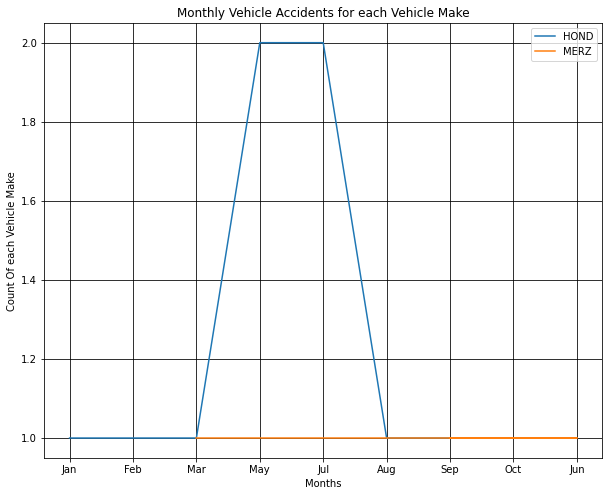

In [ ]:
#Line Graph
import numpy as np 
import matplotlib.pyplot as plt 

#Figure Size of the Graph
plt.figure(figsize=(10,8))

#Plotting the graph using the extracted values
plt.plot(t4.VEHICLE_MAKE,label='HOND');
plt.plot(t2.VEHICLE_MAKE,label='MERZ');

#Plot decor
plt.xlabel("Months")
plt.ylabel("Count Of each Vehicle Make")
plt.title("Monthly Vehicle Accidents for each Vehicle Make")
plt.grid(True,color='k')
plt.legend(loc=1)
plt.show()